In [41]:
# print, variables, types
print("Hello, Data Science!")
name = "Swapnil"
age = 28
pi = 3.14159


# basic types
print(type(name), type(age), type(pi))


# conditionals
if age > 18:
  print("Adult")
else:
  print("Minor")


# loops
for i in range(5):
  print(i)


# functions
def square(x):
  return x*x


print(square(5))


# list comprehensions
squares = [x*x for x in range(10)]
print(squares)

Hello, Data Science!
<class 'str'> <class 'int'> <class 'float'>
Adult
0
1
2
3
4
25
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [42]:
# list files
import os
print(os.listdir('.'))


# read a text file
with open('SDSS_DR18.csv', 'r') as f:
  s = f.read()
print(s[:200])

['.config', 'SDSS_DR18.csv', 'sample_data']
objid,specobjid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,plate,mjd,fiberid,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,


In [43]:
import numpy as np
import pandas as pd
arr = np.arange(12).reshape(3,4)
df = pd.DataFrame(arr, columns=['a','b','c','d'])
print(df.head())

   a  b   c   d
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [45]:
df = pd.read_csv('SDSS_DR18.csv')

In [46]:
# top rows
df.head()
# summary
df.info()
# numerical description
df.describe()
# class distribution
df['class'].value_counts()
# missing values
df.isna().sum().sort_values(ascending=False).head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   objid        100000 non-null  float64
 1   specobjid    100000 non-null  float64
 2   ra           100000 non-null  float64
 3   dec          100000 non-null  float64
 4   u            100000 non-null  float64
 5   g            100000 non-null  float64
 6   r            100000 non-null  float64
 7   i            100000 non-null  float64
 8   z            100000 non-null  float64
 9   run          100000 non-null  int64  
 10  rerun        100000 non-null  int64  
 11  camcol       100000 non-null  int64  
 12  field        100000 non-null  int64  
 13  plate        100000 non-null  int64  
 14  mjd          100000 non-null  int64  
 15  fiberid      100000 non-null  int64  
 16  petroRad_u   100000 non-null  float64
 17  petroRad_g   100000 non-null  float64
 18  petroRad_i   100000 non-n

,0
objid,0
specobjid,0
ra,0
dec,0
u,0
g,0
r,0
i,0
z,0
run,0


In [47]:
# drop
for c in ['objid','specobjid']:
  if c in df.columns:
    df.drop(columns=c, inplace=True)


# fill missing with median
num_cols = df.select_dtypes(include=['int64','float64']).columns
for c in num_cols:
  df[c].fillna(df[c].median(), inplace=True)


# label encode target if needed
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target_enc'] = le.fit_transform(df['class'])

/tmp/ipython-input-812439757.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].median(), inplace=True)


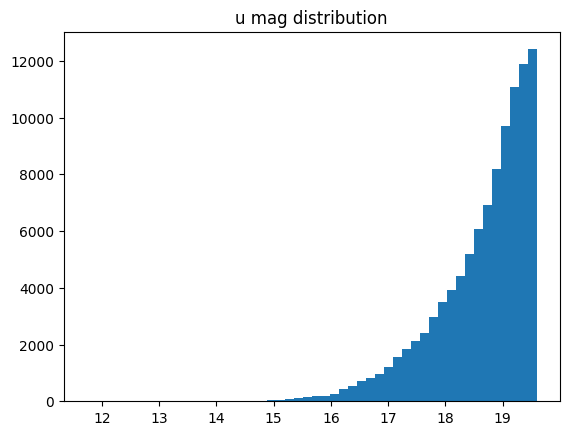

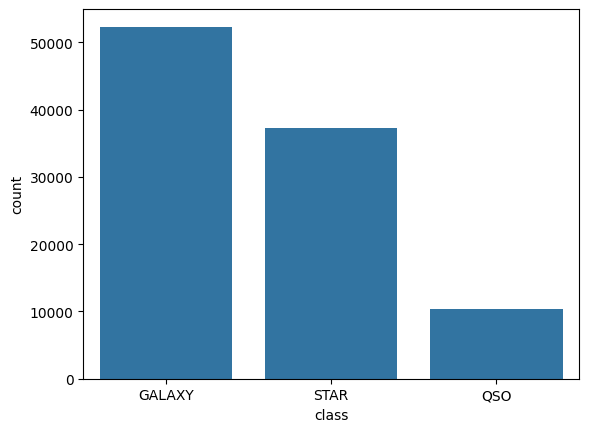

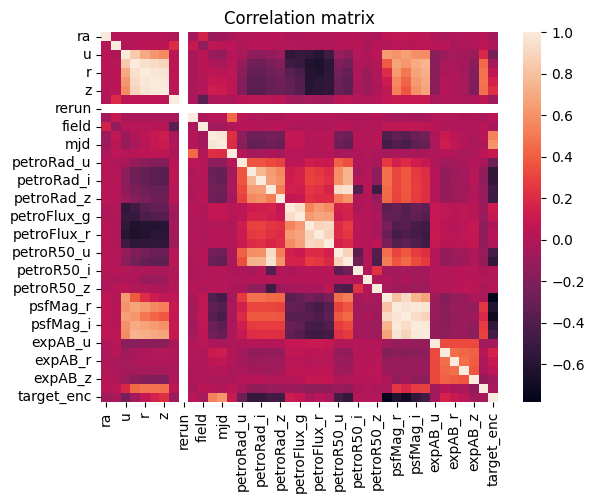

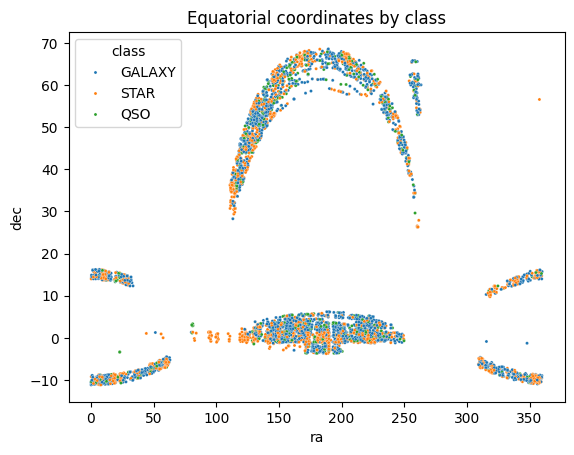

In [48]:
# distribution
plt.hist(df['u'], bins=50)
plt.title('u mag distribution')
plt.show()


# seaborn countplot for classes
sns.countplot(x='class', data=df)
plt.show()


# correlation heatmap (sample if data large)
num = df.select_dtypes(include=['number']).sample(5000, random_state=1)
corr = num.corr()
sns.heatmap(corr, annot=False)
plt.title('Correlation matrix')
plt.show()


# sky coordinates scatter (ra, dec) colored by class
sns.scatterplot(data=df.sample(5000), x='ra', y='dec', hue='class', s=5)
plt.title('Equatorial coordinates by class')
plt.show()

In [49]:
# example: color indices in astronomy (u-g, g-r, r-i, i-z)
df['u_g'] = df['u'] - df['g']
df['g_r'] = df['g'] - df['r']


# drop near-constant columns
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.0)
sel.fit(df.select_dtypes(include=['number']))

VarianceThreshold()

# Task
Split the `df` dataframe into features (X) and target (y) using 'target_enc' as the target variable. Then, split the data into training and testing sets, and apply `StandardScaler` to scale the numerical features in both training and testing sets. Train and evaluate Logistic Regression, LinearSVC, Decision Tree, Random Forest, K-Nearest Neighbors, and Gradient Boosting models, printing classification reports for each. Compare the performance of all models using a bar plot of accuracy or F1-score. Finally, summarize the performance and identify the best-performing model.

## Prepare Data for ML

### Subtask:
Split the dataframe into features (X) and target (y) using 'target_enc' as the target variable. Then, split the data into training and testing sets. After splitting, apply StandardScaler to scale the numerical features in both training and testing sets.


**Reasoning**:
The subtask requires splitting the data into features (X) and target (y), then into training and testing sets, and finally scaling the numerical features. This code block will perform all these steps sequentially.



**Reasoning**:
The previous code failed because the `stratify` parameter was used with classes in `y` that had only one member, preventing proper splitting. To fix this, I will identify and remove these single-member classes from both `X` and `y` before performing the train-test split and scaling.



In [50]:
X = df.drop(columns=['class', 'target_enc'])
y = df['target_enc']

# Identify classes with only one member
class_counts = y.value_counts()
single_member_classes = class_counts[class_counts < 2].index

# Filter X and y to remove rows corresponding to single-member classes
filtered_indices = y[~y.isin(single_member_classes)].index
X_filtered = X.loc[filtered_indices]
y_filtered = y.loc[filtered_indices]

# Split data into training and testing sets using the filtered data
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, stratify=y_filtered, random_state=42)

# Identify numerical columns (all features in X are numerical in this dataset)
numerical_cols = X_filtered.select_dtypes(include=['float64', 'int64']).columns

# Initialize and fit StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Reconstruct DataFrames with scaled numerical features
X_train_processed = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index)
X_test_processed = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index)

print("Data split into training and testing sets, and numerical features scaled.")
print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_test_processed shape: {X_test_processed.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets, and numerical features scaled.
X_train_processed shape: (80000, 42)
X_test_processed shape: (20000, 42)
y_train shape: (80000,)
y_test shape: (20000,)


## Train and Evaluate Logistic Regression

### Subtask:
Train a Logistic Regression model on the scaled training data and evaluate its performance on the scaled test data. Calculate accuracy, precision, recall, and F1-score, and print a classification report.


**Reasoning**:
The subtask requires training a Logistic Regression model, making predictions, and evaluating its performance using a classification report. This code block will perform all these steps by importing the necessary classes, instantiating and fitting the model, making predictions, and then printing the classification report.



In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Instantiate Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the scaled training data
log_reg.fit(X_train_processed, y_train)

# Make predictions on the scaled test data
y_pred_log_reg = log_reg.predict(X_test_processed)

# Print classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10469
           1       0.98      0.95      0.97      2085
           2       0.99      1.00      1.00      7446

    accuracy                           0.99     20000
   macro avg       0.99      0.98      0.98     20000
weighted avg       0.99      0.99      0.99     20000



## Train and Evaluate Support Vector Machines

### Subtask:
Train a LinearSVC model on the scaled training data and evaluate its performance on the scaled test data. Calculate accuracy, precision, recall, and F1-score, and print a classification report.


**Reasoning**:
The subtask requires training a LinearSVC model, making predictions, and evaluating its performance using a classification report. This code block will perform all these steps by importing the necessary classes, instantiating and fitting the model, making predictions, and then printing the classification report.



In [52]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Instantiate LinearSVC model
linear_svc = LinearSVC(random_state=42, max_iter=5000)

# Fit the model to the scaled training data
linear_svc.fit(X_train_processed, y_train)

# Make predictions on the scaled test data
y_pred_linear_svc = linear_svc.predict(X_test_processed)

# Print classification report
print("LinearSVC Classification Report:")
print(classification_report(y_test, y_pred_linear_svc))

LinearSVC Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10469
           1       0.98      0.94      0.96      2085
           2       0.99      1.00      1.00      7446

    accuracy                           0.99     20000
   macro avg       0.99      0.98      0.98     20000
weighted avg       0.99      0.99      0.99     20000



## Train and Evaluate Decision Tree

### Subtask:
Train a Decision Tree model on the scaled training data and evaluate its performance on the scaled test data. Calculate accuracy, precision, recall, and F1-score, and print a classification report.

## Train and Evaluate Decision Tree

### Subtask:
Train a Decision Tree model on the scaled training data and evaluate its performance on the scaled test data. Calculate accuracy, precision, recall, and F1-score, and print a classification report.

**Reasoning**:
The subtask requires training a Decision Tree model, making predictions, and evaluating its performance using a classification report. This code block will perform all these steps by importing the necessary classes, instantiating and fitting the model, making predictions, and then printing the classification report.



In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Instantiate Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model to the scaled training data
decision_tree.fit(X_train_processed, y_train)

# Make predictions on the scaled test data
y_pred_decision_tree = decision_tree.predict(X_test_processed)

# Print classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_decision_tree))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10469
           1       0.96      0.95      0.96      2085
           2       1.00      1.00      1.00      7446

    accuracy                           0.99     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.99      0.99      0.99     20000



## Train and Evaluate Random Forest

### Subtask:
Train a Random Forest model on the scaled training data and evaluate its performance on the scaled test data. Calculate accuracy, precision, recall, and F1-score, and print a classification report.

**Reasoning**:
The subtask requires training a Random Forest model, making predictions, and evaluating its performance using a classification report. This code block will perform all these steps by importing the necessary classes, instantiating and fitting the model, making predictions, and then printing the classification report.



In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Instantiate Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Fit the model to the scaled training data
random_forest.fit(X_train_processed, y_train)

# Make predictions on the scaled test data
y_pred_random_forest = random_forest.predict(X_test_processed)

# Print classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_random_forest))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10469
           1       0.99      0.95      0.97      2085
           2       0.99      1.00      1.00      7446

    accuracy                           0.99     20000
   macro avg       0.99      0.98      0.98     20000
weighted avg       0.99      0.99      0.99     20000

